VERİ SETİ HAKKINDA: COVID-19 salgınına yanıt olarak Beyaz Saray ve önde gelen araştırma gruplarından oluşan bir koalisyon, COVID-19 Açık Araştırma Veri Kümesini (CORD-19) hazırladı. CORD-19, COVID-19, SARS-CoV-2 ve ilgili koronavirüsler hakkında 400.000'den fazlası tam metin dahil olmak üzere 1.000.000'den fazla bilimsel makale içeren bir kaynaktır.

PROJENİN AMACI: Korelasyon  analizi ile "Confirmed" ile "Deaths" arasındaki ilişkinin incelenmesi

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

VERİ SETİNİ YÜKLEME VE İNCELEME:

In [5]:
data = pd.read_csv('cord_19.csv')
data.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,1/22/2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,1/22/2020,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,1/22/2020,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,1/22/2020,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,1/22/2020,0,0,0,0,Africa


In [6]:
data.tail()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,7/27/2020,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,7/27/2020,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,7/27/2020,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,7/27/2020,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,7/27/2020,505,12,128,365,Africa


In [7]:
data.shape

(49068, 10)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province_State  14664 non-null  object 
 1   Country_Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


VERİ ÖN İŞLEME:

Eksik Verilere Bakalım:

In [9]:
print("Kayıp Değerlerin Sayısı: ")
for kolon in data.columns:
  top = sum(data[kolon].isna())
  print('{}:{}'.format(kolon, top))

Kayıp Değerlerin Sayısı: 
Province_State:34404
Country_Region:0
Lat:0
Long:0
Date:0
Confirmed:0
Deaths:0
Recovered:0
Active:0
WHO Region:0


Veri Setinin İstatistiksel Bilgilerine Bakalım:

In [10]:
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915714e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


2020 yılında aylara göre "Confirmed" ve "Deaths" verileri arasındaki ilişkiyi çubuk grafiğiyle görelim:

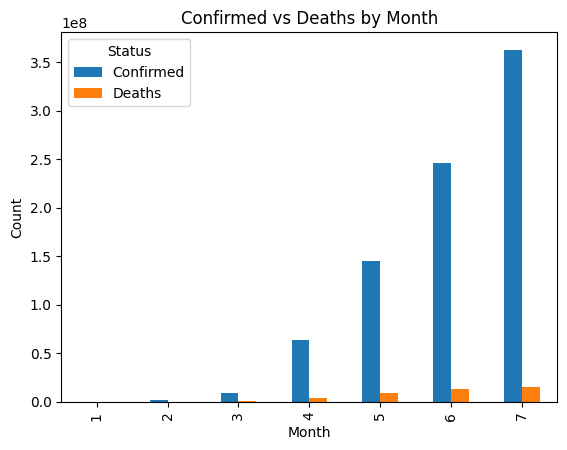

In [27]:
# "Date" sütununu datetime formatına çevirelim
data['Date'] = pd.to_datetime(data['Date'])

# "Date" sütunundan ayları alalım
data['Month'] = data['Date'].dt.month

# "Recovered" ve "Deaths" verilerini gruplama
toplamlar = data.groupby('Month')[['Confirmed', 'Deaths']].sum()

# Çubuk grafiği
toplamlar.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Confirmed vs Deaths by Month')
plt.legend(title='Status')
plt.show()

"Confirmed" ile "Deaths" arasındaki ilişkinin Korelasyon Analizi ile  değerlendirilmesi:

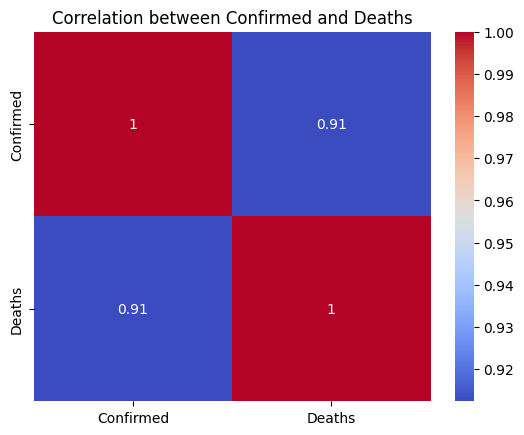

In [24]:
# "Confirmed" ve "Deaths" değişkenleri arasındaki korelasyon matrisinin hesaplanması
korelasyon_matrisi = data[['Confirmed', 'Deaths']].corr()

# Korelasyon matrisini görselleştirilmesi
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm')
plt.title('Correlation between Confirmed and Deaths')
plt.show()


"Confirmed" ve "Deaths" arasındaki korelasyon değeri 0.91' dir. Bu durum aralarında yüksek pozitif bir korelasyon olduğunu ve iki değişken arasında güçlü ve doğrusal bir ilişkinin olduğunu gösterir. Yorum yapacak olursak: Bu yüksek korelasyon değeri, onaylanmış COVID-19 vakalarının sayısının artmasıyla ölüm sayılarının da arttığını göstermektedir. Yani, daha fazla onaylanmış vaka sayısı genellikle daha fazla ölümle ilişkilendirilmiştir. Bu durum, COVID-19 hastalığının ciddiyetini ve yayılımının ölüm sayılarına etkisini vurgulamaktadır. Ancak, korelasyon sadece iki değişken arasındaki ilişkinin gücünü gösterirken, nedensel bir ilişki hakkında kesin bir sonuç çıkarmak için daha fazla analiz yapmak gerekebilir.